In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Remove rows with missing values in key columns
df = df.dropna(subset=['price', 'room_type', 'number_of_reviews', 'neighbourhood'])


In [ ]:
# Convert price to numeric (in case it's string)
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [ ]:
# Filter out unrealistic prices
df = df[(df['price'] > 0) & (df['price'] < 1000)]

In [ ]:
##Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

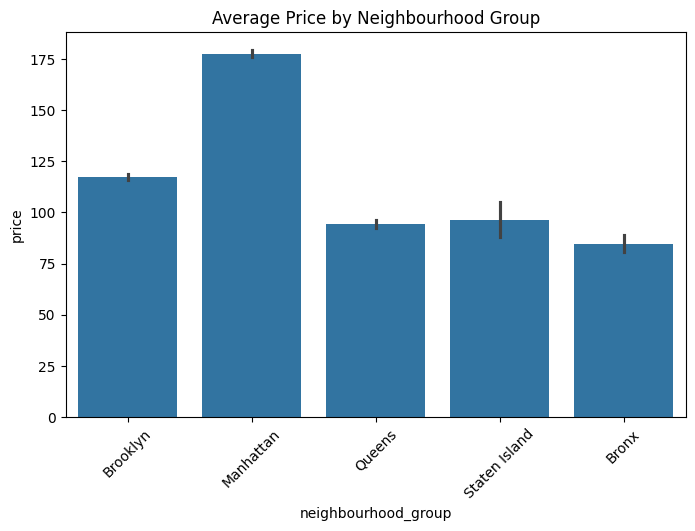

In [ ]:
# Average price by neighbourhood group
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title("Average Price by Neighbourhood Group")
plt.xticks(rotation=45)
plt.show()

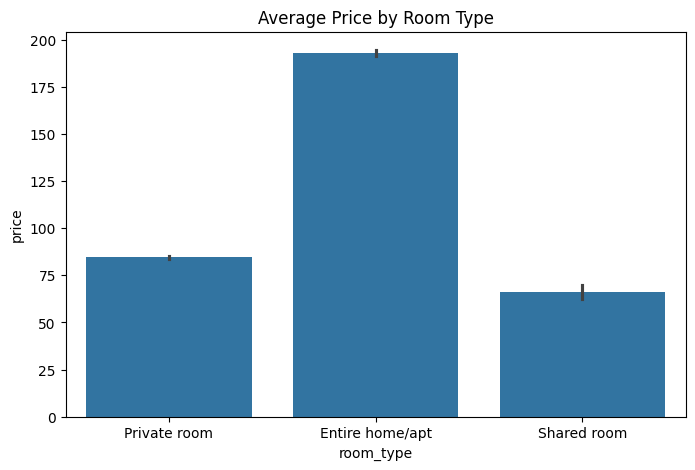

In [ ]:
# Average price by room type
plt.figure(figsize=(8,5))
sns.barplot(x='room_type', y='price', data=df)
plt.title("Average Price by Room Type")
plt.show()

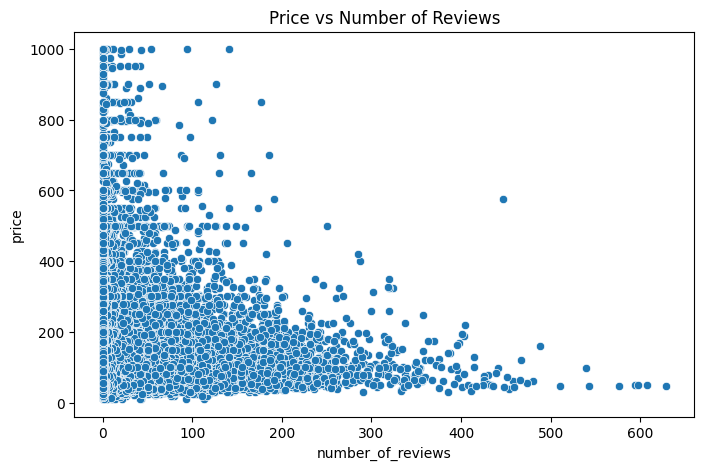

In [ ]:
# Price vs number of reviews
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title("Price vs Number of Reviews")
plt.show()

In [ ]:
##Regression Model (Pricing Predictors)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Select relevant features
df_model = df[['latitude', 'longitude', 'number_of_reviews', 'room_type', 'price']]


In [ ]:
# One-hot encode room_type
df_model = pd.get_dummies(df_model, columns=['room_type'], drop_first=True)


In [ ]:
# Features & Target
X = df_model.drop('price', axis=1)
y = df_model['price']

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test) #prediction


In [ ]:
# Evaluation
rmse = mean_squared_error(y_test, y_pred)**0.5  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

RMSE: 96.68
R² Score: 0.27


In [ ]:
#Export Processed Data for Tableau

In [ ]:
# Creating a clean version for Tableau
tableau_data = df[['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
                   'longitude', 'room_type', 'price', 'number_of_reviews']]

# Saving to CSV
tableau_data.to_csv('processed_airbnb_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('processed_airbnb_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>